<a href="https://colab.research.google.com/github/Tserenkhand0616/Dive-into-code/blob/main/Wheat_and_Chessboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Question 1] Number of wheat on a 2x2 square chessboard
Represent a chessboard with 2x2 squares as an ndarray and calculate the number of grains in each square. Place 1 wheat in the top left square, then 2 on the right, 4 on the bottom left, 8 on the bottom right, and so on.

Transform the shape of the ndarray created in the sample code.



In [ ]:
import numpy as np
n=4
small_board_list=[1]
for _ in  range(n-1):
  small_board_list.append(2*small_board_list[-1])

small_board_ndarray=np.array(small_board_list)
small_board_shaped=small_board_ndarray.reshape(2,2)
small_board_shaped

array([[1, 2],
       [4, 8]])

[Problem 2] Extension to n × m squares
Create a function that returns an ndarray of wheat counts on an nxm chessboard. Then use this function to find the number of wheat on an 8x8 chessboard.

In [ ]:

n=8
m=8
def find_number_of_wheat(n,m):
  '''
  A function that calculates how many wheat on each chessboard6

  Parameters:

  n = row of chessboard

  m = column of chessboard

  c = number of chessboard

  nxm_board_list = 1D array of wheat on each chessboard

  Returns:

  done_board_wheat = 2 D array wheat on each chessboard

  '''

  c=n*m

  nxm_board_list=[1]

  for _ in range(c-1):

    nxm_board_list.append(2*nxm_board_list[-1])

  done_board_wheat = np.array(nxm_board_list).reshape(n,m)

  return done_board_wheat

last_board_wheat=np.array(find_number_of_wheat(n,m))


[Question 3] Total number of wheat
Find the total number of wheat on an 8x8 chess board. Also find the average of each column and visualize it in a bar chart.

Sample code for bar charts is available.

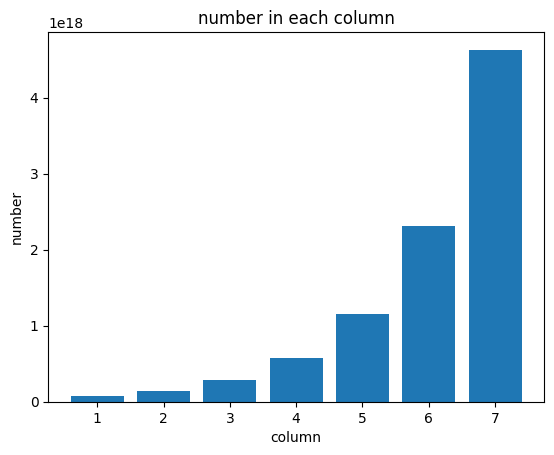

The total number of wheat 8x8 = 1.8446744073709552e+19


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def find_total_number_of_wheat(last_board_wheat):
  '''
  A function that calculates find the sum of the columns of wheat on chessboard and total wheat.

  Parameters:

  last_board_wheat = 2D array on wheat of chessboard

  needed_array = 1D array of wheat on chessboard

  total_wheat = total wheat on chessboard

  column = array that contain each column total wheat

  Return:

  total_wheat = total wheat on chessboard

  column = total wheat of each column on chessboard
  '''
  needed_array=last_board_wheat.flatten()
  total_wheat=np.sum(needed_array)
  column=[]
  for i in range(7):
    column.append(np.sum(last_board_wheat[:,i]))
  return total_wheat , column
total, bar = find_total_number_of_wheat(last_board_wheat)
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,8), bar)
plt.show()
print("The total number of wheat 8x8 = {}".format(total))


[Question 4] Heat map of the number of wheat
Visualize the number of wheat on an 8x8 square chessboard as a heatmap.

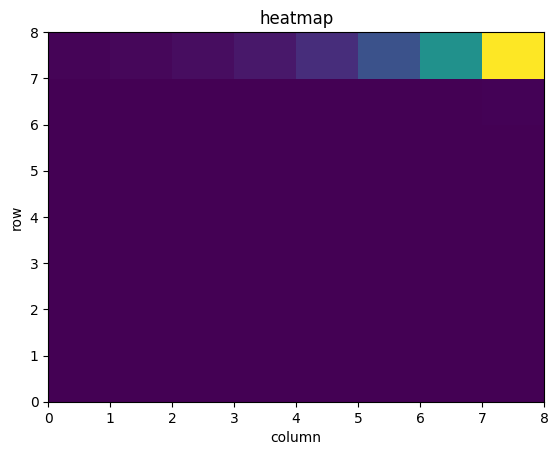

In [ ]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(last_board_wheat)
plt.show()

[Question 5] How many times the second half is the first half?
Find the number of wheat in the second half of the chessboard multiplied by the number of wheat in the first half. The first half is rows 0 to 3 of the array, the second half is rows 4 to 7.

In [ ]:
S=0
for i in range(3):
  S=S+np.sum(last_board_wheat[i,:])
first_half=S

Z=0
for i in range(4,7):
  Z=Z+np.sum(last_board_wheat[i,:])
second_half=Z
How_many_time=second_half/first_half
print(" this {} times ".format(How_many_time))

 this 4294967296.0 times 


[Problem 6] Extension to n × m squares by other calculation methods
np.append()Create a new `` function that returns an ndarray that describes the number of wheat on an n x m square chessboard'' similar to Problem 2, one that uses and one that uses broadcasting .

Use those functions to find again the number of wheat on the 8x8 square chessboa

In [ ]:
%%timeit
n=8
m=8
def find1_number_of_wheat(n,m):
  '''
  A function that calculates how many wheat on each chessboard6

  Parameters:

  n = row of chessboard

  m = column of chessboard

  c = number of chessboard

  nxm_board_list = 1D array of wheat on each chessboard

  Returns:

  done_board_wheat = 2 D array wheat on each chessboard

  '''

  c=n*m

  index=np.arange(c)

  nxm_board_list = 2**index

  done_board_wheat = np.array(nxm_board_list).reshape(n,m)

  return done_board_wheat

last_board_wheat=np.array(find1_number_of_wheat(n,m))


6.59 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%%timeit
n=8
m=8
def find2_number_of_wheat(n,m):
  '''
  A function that calculates how many wheat on each chessboard6

  Parameters:

  n = row of chessboard

  m = column of chessboard

  c = number of chessboard

  nxm_board_list = 1D array of wheat on each chessboard

  Returns:

  done_board_wheat = 2 D array wheat on each chessboard

  '''
  nxm_board_list = np.array([1])
  c=n*m
  for _ in range(c-1):

    nxm_board_list=np.append(nxm_board_list, 2*nxm_board_list[-1])

  done_board_wheat = np.array(nxm_board_list).reshape(n,m)

  done_board_wheat = np.array(nxm_board_list).reshape(n,m)

  return done_board_wheat

last_board_wheat=np.array(find2_number_of_wheat(n,m))

<magic-timeit>:26: RuntimeWarning: overflow encountered in long_scalars


372 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


[Question 7] Comparison of calculation time
I've seen 3 different methods. Please measure each calculation time %%timeitusing Jupyter Notebook and compare and discuss.

In [ ]:
%%timeit
n=8
m=8
last_board_wheat=np.array(find1_number_of_wheat(n,m))# Broadcast method


4.74 µs ± 306 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%%timeit
n=8
m=8
last_board_wheat=np.array(find2_number_of_wheat(n,m)) # ndarray method

<ipython-input-42-b9405cd8cf04>:26: RuntimeWarning: overflow encountered in long_scalars
  nxm_board_list=np.append(nxm_board_list, 2*nxm_board_list[-1])


486 µs ± 136 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
n=8
m=8
last_board_wheat=np.array(find_number_of_wheat(n,m)) # my first method

24.7 µs ± 3.35 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Broadcat It took the least amount of time out of the other 3 methods